# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [142]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service


import matplotlib.pyplot as plt
import pandas as pd

In [143]:
my_service = Service(executable_path='/Users/laurafaulds/Downloads/chromedriver_mac_arm64/chromedriver')
browser = Browser('chrome', service=my_service)


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [144]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [145]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [146]:
# Get the header as a list
header_soup = soup.find("tr")
print(header_soup)

header_columns = []

for header in header_soup.find_all("th"):
    header_columns.append(header.text)
    

<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>


In [147]:
# Extract all rows of data

rows = soup.find_all("tr", class_="data-row")
# print(rows)

rows_list = []

for row in rows:
    rows_list.append(row.text)



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [148]:
# Create an empty list

table_list = []

# Loop through the scraped data to create a list of rows
    
for row_text in rows_list:
    temp_list = [data_point for data_point in row_text.split("\n") if data_point] 
    table_list.append(temp_list)


In [149]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

table_df = pd.DataFrame(data= table_list, columns= header_columns)

In [150]:
# Confirm DataFrame was created successfully
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [151]:
# Examine data type of each column
table_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [152]:
# Change data types for data analysis

table_df["terrestrial_date"] = table_df["terrestrial_date"].astype("datetime64[ns]")
table_df["sol"] = table_df["sol"].astype("int64")
table_df["ls"] = table_df["ls"].astype("int64")
table_df["month"] = table_df["month"].astype("int64")
table_df["min_temp"] = table_df["min_temp"].astype("float64")
table_df["pressure"] = table_df["pressure"].astype("float64")

In [153]:
# Confirm type changes were successful by examining data types again
table_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [155]:
# 1. How many months are there on Mars?

month_count = table_df["month"].value_counts()
month_count_sorted = month_count.sort_index(ascending=True)
month_count_sorted


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [156]:
# 2. How many Martian days' worth of data are there?

sol_count = len(table_df["sol"])
sol_count

1867

In [157]:
# 3. What is the average low temperature by month?

avg_low_temp = table_df.groupby("month")["min_temp"].mean()
avg_low_temp


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

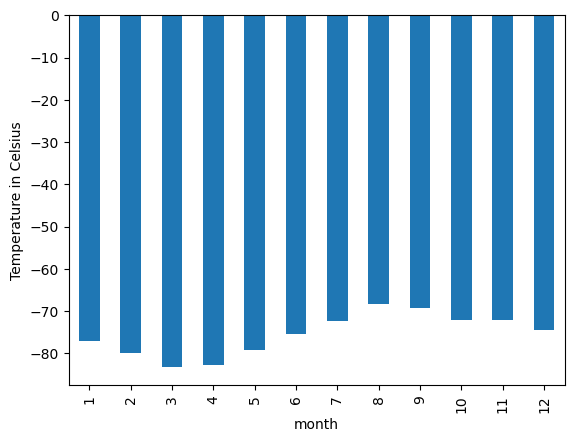

<Figure size 640x480 with 0 Axes>

In [158]:
# Plot the average temperature by month

avg_low_temp.plot(kind="bar", ylabel="Temperature in Celsius")

plt.show()
plt.tight_layout()

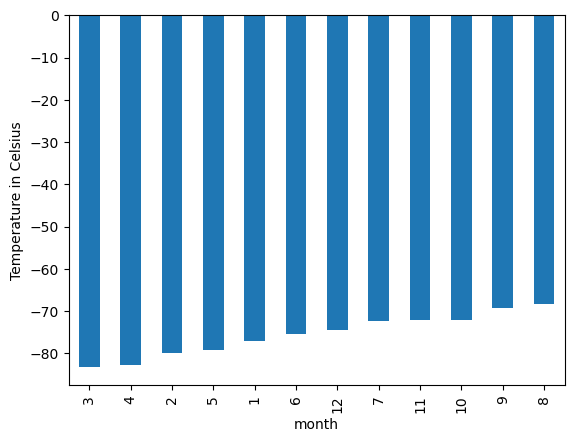

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest.


<Figure size 640x480 with 0 Axes>

In [159]:
# Identify the coldest and hottest months in Curiosity's location
cold_hot_temp = avg_low_temp.sort_values(ascending=True)

cold_hot_temp.plot(kind="bar", ylabel="Temperature in Celsius")

plt.show()
plt.tight_layout()

print("On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest.")


In [160]:
# 4. Average pressure by Martian month
avg_pressure = table_df.groupby("month")["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

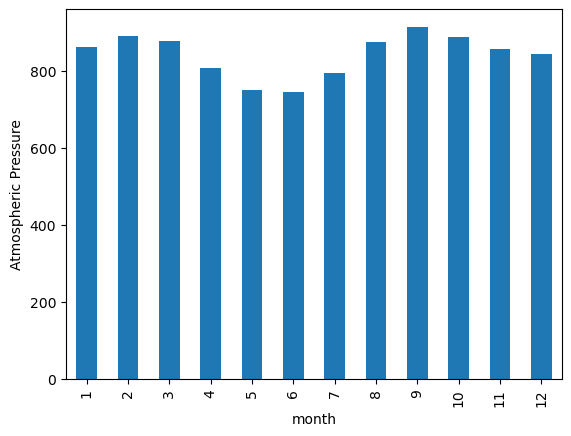

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.


<Figure size 640x480 with 0 Axes>

In [161]:
# Plot the average pressure by month

avg_pressure.plot(kind="bar", ylabel="Atmospheric Pressure")

plt.show()
plt.tight_layout()

print("Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.")

The total number of sols in a Martian year: 668, corresponds to data found on NASA website
The total number of terrestrial days in a Martian year: 687


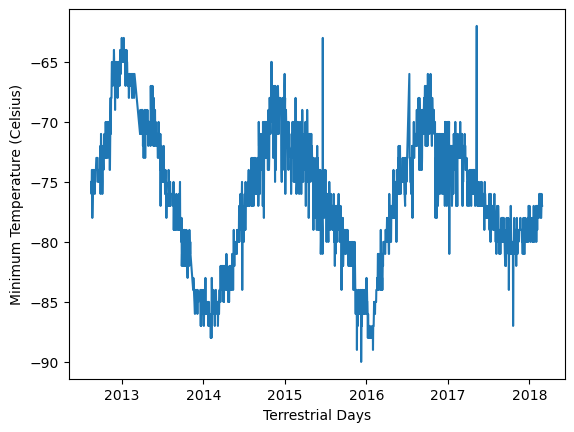

In [162]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Find the first sol in a complete Martian year
min_sols = table_df.loc[(table_df["month"] == 1) & (table_df["ls"] == 0), "sol"]
min_sol = min_sols.min()

# find the last sol in a complete Martian year
max_sols = table_df.loc[(table_df["month"] == 1) & (table_df["ls"] == 0) & (table_df["sol"] > 1 + min_sol), "sol"]
max_sol = max_sols.min()

# find the total numbers of sols in Martian year
sols_in_martian_year = max_sol - min_sol
print(f"The total number of sols in a Martian year: {sols_in_martian_year}, corresponds to data found on NASA website")

# calculate first earth day in a martian year
first_terrestrial = pd.to_datetime(table_df.loc[table_df["sol"] == 351, "terrestrial_date"]).iloc[0]

# calculate last earth day in a Martian year
last_terrestrial = pd.to_datetime(table_df.loc[(table_df["sol"] == 1019), "terrestrial_date"]).iloc[0]

#calculate total amount of days in a Martian year
total_earth_days = (last_terrestrial - first_terrestrial).days
print(f"The total number of terrestrial days in a Martian year: {total_earth_days}")

terrestrial_days = table_df["terrestrial_date"]
min_temp = table_df['min_temp']

plt.plot(terrestrial_days, min_temp)
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (Celsius)')
plt.show()


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [163]:
# Write the data to a CSV

table_df.to_csv("Resources/mars_data.csv", index=False, header=True)


In [164]:
browser.quit()